In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import random

In [2]:
Enter_year = 1992
Temp_file_location = "F:\DG\Era5Land\\" + str(Enter_year) + "\\Hourly_T.csv" #uncertainty not known
Temp_file_location

'F:\\DG\\Era5Land\\1992\\Hourly_T.csv'

In [5]:
df_day_9tiles = pd.read_csv(Temp_file_location)
df_day_9tiles.head(3)

,Julian day,Date,"30.7,79.8","30.7,79.9","30.7,80.0","30.6,79.8","30.6,79.9","30.6,80.0","30.5,79.8","30.5,79.9","30.5,80.0"
0,152.01,1992-06-01 0:00:00,-9.103370,-10.931345,-14.298667,-7.599221,-12.140999,-16.021046,-8.912125,-14.056970,-16.370684
1,152.02,1992-06-01 1:00:00,-8.096693,-9.355626,-12.591540,-6.204188,-10.497230,-14.327999,-6.884692,-12.383869,-14.853630
2,152.03,1992-06-01 2:00:00,-4.732891,-6.068087,-9.194886,-2.479015,-6.992634,-10.806977,-3.017552,-8.576566,-11.113204


In [6]:
elevations = [4284.205724, 4298.853308, 
              4626.426531, 4041.854803, 
              4558.310148, 4995.68903, 
              4323.948817, 4979.197695, 5175.864546]  #uncertainty not known

In [7]:
lapse_rate_hourly = [] #Hourly Lapse rate of the given year
for i in range(4656):
    def func(X, a, c):
        return a*X + c
    
    # X and Ydata
    X = elevations
    Ydata = list(df_day_9tiles.iloc[i, 2:])
    popt, pcov = curve_fit(func, X, Ydata)
    #print(pcov[0][0]**0.5) uncertainty
    lapse_rate_hourly.append((popt[0]  + random.uniform(-pcov[0][0]**0.5,pcov[0][0]**0.5) )*(-1000))
df_day_9tiles['LapseRate'] = lapse_rate_hourly
df_day_9tiles.head()

,Julian day,Date,"30.7,79.8","30.7,79.9","30.7,80.0","30.6,79.8","30.6,79.9","30.6,80.0","30.5,79.8","30.5,79.9","30.5,80.0",LapseRate
0,152.01,1992-06-01 0:00:00,-9.103370,-10.931345,-14.298667,-7.599221,-12.140999,-16.021046,-8.912125,-14.056970,-16.370684,7.365096
1,152.02,1992-06-01 1:00:00,-8.096693,-9.355626,-12.591540,-6.204188,-10.497230,-14.327999,-6.884692,-12.383869,-14.853630,8.206245
2,152.03,1992-06-01 2:00:00,-4.732891,-6.068087,-9.194886,-2.479015,-6.992634,-10.806977,-3.017552,-8.576566,-11.113204,8.576910
3,152.04,1992-06-01 3:00:00,-2.125857,-3.112588,-5.930813,0.366196,-3.895167,-7.497146,-0.024507,-5.348865,-7.652019,7.743078
4,152.05,1992-06-01 4:00:00,-0.566564,-1.251761,-3.763760,1.980633,-1.945171,-5.306627,1.629822,-3.429374,-5.503738,6.263289


In [8]:
sum(lapse_rate_hourly)/len(lapse_rate_hourly)

5.276900683832197

In [9]:
continuous_day = []

for i in range(4656):
    cd = (df_day_9tiles.iloc[i, 0] - int(df_day_9tiles.iloc[i, 0]))*100/24 + int(df_day_9tiles.iloc[i, 0])
    continuous_day.append(cd)


Text(0, 0.5, 'Lapse Rate °C/Km')

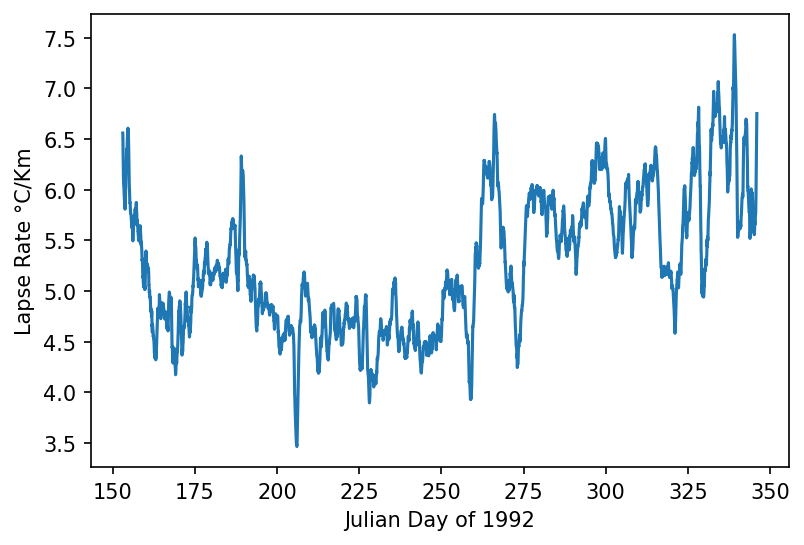

In [10]:
day_for_ave_lapserate = 1
window_size = int(day_for_ave_lapserate*24)
numbers_series = pd.Series(lapse_rate_hourly)
windows = numbers_series.rolling(window_size)
moving_averages = windows.mean()
moving_averages_list = moving_averages.tolist()
without_nans_lr = moving_averages_list[window_size - 1:]

plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 150
df_day_9tiles['Moving_average_lapse_rate'] = moving_averages_list
df_day_9tiles['continuous_day'] = continuous_day
#plt.plot(df_day_9tiles['continuous_day'], lapse_rate_hourly)
plt.plot(df_day_9tiles['continuous_day'] ,df_day_9tiles['Moving_average_lapse_rate'])
plt.xlabel('Julian Day of {}'.format(Enter_year))
plt.ylabel('Lapse Rate °C/Km')

In [11]:
df = df_day_9tiles.iloc[window_size:, :] #df starts with day 153
df.head()

,Julian day,Date,"30.7,79.8","30.7,79.9","30.7,80.0","30.6,79.8","30.6,79.9","30.6,80.0","30.5,79.8","30.5,79.9","30.5,80.0",LapseRate,Moving_average_lapse_rate,continuous_day
24,153.01,1992-06-02 0:00:00,-4.756357,-5.748954,-8.592992,-2.707805,-6.542094,-9.719344,-3.604193,-8.127199,-9.454182,6.826443,6.537323,153.041667
25,153.02,1992-06-02 1:00:00,-4.317549,-5.439208,-8.145971,-2.339394,-6.057528,-9.306348,-3.015205,-7.438482,-8.783064,5.299757,6.416219,153.083333
26,153.03,1992-06-02 2:00:00,-1.926399,-2.840386,-5.108342,0.390835,-3.369537,-6.361408,0.013038,-4.447784,-6.389567,5.138622,6.272957,153.125000
27,153.04,1992-06-02 3:00:00,0.613759,-0.079651,-2.406271,2.832437,-0.755462,-3.849409,2.474586,-2.006182,-4.011322,5.491999,6.179162,153.166667
28,153.05,1992-06-02 4:00:00,1.670887,1.119444,-1.081635,4.049131,0.416647,-2.598690,3.830901,-0.858711,-2.836866,5.091110,6.130321,153.208333


# Calculating T at 4200 meter height

In [10]:
df['T_4200']= df['Moving_average_lapse_rate']*(elevations[0] - 4200 )/1000 + df['30.7,79.8']
df.index = np.arange(4632 )
loc_t_lr = "F:\DG\Era5Land\\" + str(Enter_year) + "\\Hourly_T_lr.csv"
df.to_csv(loc_t_lr, index = False)

<ipython-input-10-1d01b35edaa7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['T_4200']= df['Moving_average_lapse_rate']*(elevations[0] - 4200 )/1000 + df['30.7,79.8']


In [11]:
loc_dg_data = "F:\DG\Era5Land\\" + str(Enter_year) + "\\dg_glacier_data.csv"
dg_data = pd.read_csv(loc_dg_data)
dg_data

,year,jd1,jd2,obs_period(days),gm(10^6)m3,T_mean
0,1992,214,229,16,0.67,8.6
1,1992,230,244,15,0.60,8.6
2,1992,245,259,15,0.33,7.3
3,1992,260,274,15,0.33,5.3


In [12]:
t_mean_Era = []
for i in range(len(dg_data.index)):
    x = list(df['Julian day']).index(dg_data['jd1'][i] + .01)
    y = list(df['Julian day']).index(dg_data['jd2'][i] + 1.01)
    t_mean_Era.append(sum(df['T_4200'][x:y])/(y-x))
dg_data['T_mean_Era'] = t_mean_Era
dg_data['Bias'] = dg_data['T_mean'] - dg_data['T_mean_Era']
dg_data

,year,jd1,jd2,obs_period(days),gm(10^6)m3,T_mean,T_mean_Era,Bias
0,1992,214,229,16,0.67,8.6,7.050877,1.549123
1,1992,230,244,15,0.60,8.6,7.152522,1.447478
2,1992,245,259,15,0.33,7.3,4.968830,2.331170
3,1992,260,274,15,0.33,5.3,2.192828,3.107172


In [13]:
bias_data_loc = "F:\DG\Era5Land\\" + str(Enter_year) + "\\Bias.csv"
dg_data.to_csv(bias_data_loc, index = False)

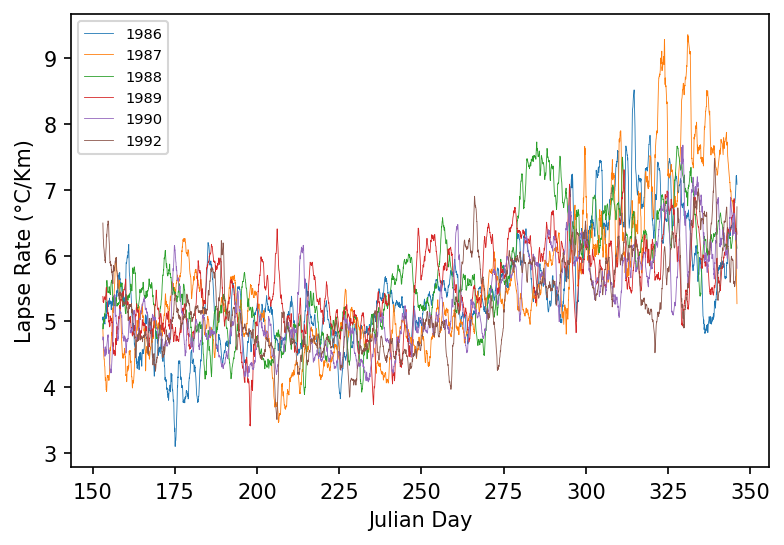

In [14]:
df_lapse_rates = pd.read_csv(r'F:\DG\Era5Land\Lapse_Rates_1dayAve.csv')
plt.plot(df['continuous_day'], df_lapse_rates['1986'], label=1986, linewidth=0.4)
plt.plot(df['continuous_day'], df_lapse_rates['1987'], label=1987, linewidth=0.4)
plt.plot(df['continuous_day'], df_lapse_rates['1988'], label=1988, linewidth=0.4)
plt.plot(df['continuous_day'], df_lapse_rates['1989'], label=1989, linewidth=0.4)
plt.plot(df['continuous_day'], df_lapse_rates['1990'], label=1990, linewidth=0.4)
plt.plot(df['continuous_day'], df_lapse_rates['1992'], label=1992, linewidth=0.4)
plt.xlabel('Julian Day')
plt.ylabel('Lapse Rate (°C/Km)')
#plt.xlim(150, 250)
#plt.ylim(3, 7)
plt.legend(prop={"size":7})
